In [32]:
import numpy as np
import pandas as pd
import scipy as sp
import IPython
import sklearn
import csv
import PIL
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [25]:
default = pd.read_csv("/home/adir/datasets/defaultcreditcards.csv")


In [26]:
print("default.keys(): \n{}".format(default.keys()))

default.keys(): 
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'nxt_mo_default_pay'],
      dtype='object')


In [27]:
#print("Shape of default data: {} ".format(default.data.shape))

In [28]:
# did this to play with the data like a bunch object in sklearn

feature_names = [key for key in default]

feature_names.remove('ID')
feature_names.remove('nxt_mo_default_pay')

target_names = [0,1]

data = default.drop(columns="ID")
data = default.drop(columns="nxt_mo_default_pay")
data = data.values

target = default["nxt_mo_default_pay"]
target = target.values


In [29]:
# count of the default vs non default in the dataset
print("Sample counts per class: \n{}".format({n: v for n, v in zip(target_names, np.bincount(target))}))

Sample counts per class: 
{0: 23364, 1: 6636}


In [34]:
X_train, X_test, y_train, y_test = train_test_split(data,target, stratify =target, random_state = 66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,25)

In [35]:
for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors =n_neighbors)
    clf.fit(X_train,y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    # record generaliztion accuracy
    test_accuracy.append(clf.score(X_test,y_test))

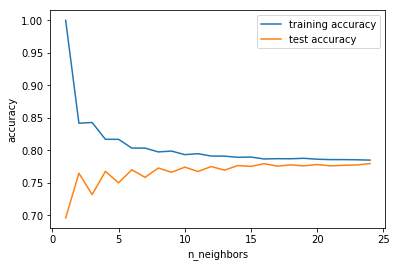

In [36]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel("accuracy")
plt.xlabel('n_neighbors')
plt.legend()